# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.5.1 tensorflow-gpu==2.5.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame, results)

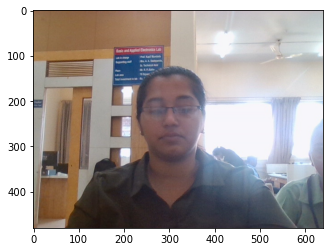

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [9]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [10]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [11]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([ lh, rh])

In [12]:
result_test = extract_keypoints(results)

In [13]:
result_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [14]:
np.save('0', result_test)

In [15]:
np.load('0.npy')

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

# 4. Setup Folders for Collection

In [16]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['accident', 'ambulance', 'breathe','emergency', 'fire', 'help'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [17]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [18]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [19]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [21]:
label_map = {label:num for num, label in enumerate(actions)}

In [22]:
label_map

{'accident': 0,
 'ambulance': 1,
 'breathe': 2,
 'emergency': 3,
 'fire': 4,
 'help': 5}

In [23]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [24]:
np.array(sequences).shape

(180, 30, 126)

In [25]:
np.array(labels).shape

(180,)

In [26]:
X = np.array(sequences)

In [27]:
X.shape

(180, 30, 126)

In [28]:
y = to_categorical(labels).astype(int)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [30]:
y_test.shape

(9, 6)

# 7. Build and Train LSTM Neural Network

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [32]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [33]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [34]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [35]:
model.fit(X_train, y_train, epochs=5000, callbacks=[tb_callback])

Epoch 1/5000
6/6 [==============================] - 8s 271ms/step - loss: 1.7596 - categorical_accuracy: 0.3216
Epoch 2/5000
6/6 [==============================] - 1s 93ms/step - loss: 1.7713 - categorical_accuracy: 0.2865
Epoch 3/5000
6/6 [==============================] - 1s 92ms/step - loss: 1.6544 - categorical_accuracy: 0.2807
Epoch 4/5000
6/6 [==============================] - 1s 93ms/step - loss: 1.5824 - categorical_accuracy: 0.3216 0s - loss: 1.4500 - categorical_accuracy
Epoch 5/5000
6/6 [==============================] - 1s 93ms/step - loss: 1.6416 - categorical_accuracy: 0.2047
Epoch 6/5000
6/6 [==============================] - 1s 92ms/step - loss: 1.5884 - categorical_accuracy: 0.2281
Epoch 7/5000
6/6 [==============================] - 1s 96ms/step - loss: 1.4766 - categorical_accuracy: 0.3801
Epoch 8/5000
6/6 [==============================] - 1s 93ms/step - loss: 1.3337 - categorical_accuracy: 0.5088
Epoch 9/5000
6/6 [==============================] - 1s 93ms/step - los

6/6 [==============================] - 1s 92ms/step - loss: 0.0877 - categorical_accuracy: 0.9708
Epoch 72/5000
6/6 [==============================] - 1s 90ms/step - loss: 0.0743 - categorical_accuracy: 0.9766
Epoch 73/5000
6/6 [==============================] - 1s 93ms/step - loss: 0.0869 - categorical_accuracy: 0.9649
Epoch 74/5000
6/6 [==============================] - 1s 93ms/step - loss: 0.1124 - categorical_accuracy: 0.9591
Epoch 75/5000
6/6 [==============================] - 1s 90ms/step - loss: 0.0627 - categorical_accuracy: 0.9825
Epoch 76/5000
6/6 [==============================] - 1s 84ms/step - loss: 0.0604 - categorical_accuracy: 0.9708
Epoch 77/5000
6/6 [==============================] - 1s 90ms/step - loss: 0.0524 - categorical_accuracy: 0.9883
Epoch 78/5000
6/6 [==============================] - 1s 87ms/step - loss: 0.0420 - categorical_accuracy: 0.9942
Epoch 79/5000
6/6 [==============================] - 1s 93ms/step - loss: 0.0680 - categorical_accuracy: 0.9825
Epoch 

6/6 [==============================] - 1s 92ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 144/5000
6/6 [==============================] - 1s 92ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 145/5000
6/6 [==============================] - 1s 93ms/step - loss: 0.0018 - categorical_accuracy: 1.0000
Epoch 146/5000
6/6 [==============================] - 1s 90ms/step - loss: 0.0020 - categorical_accuracy: 1.0000
Epoch 147/5000
6/6 [==============================] - 1s 89ms/step - loss: 0.0214 - categorical_accuracy: 0.9942
Epoch 148/5000
6/6 [==============================] - 1s 93ms/step - loss: 0.0186 - categorical_accuracy: 0.9942
Epoch 149/5000
6/6 [==============================] - 1s 93ms/step - loss: 0.9074 - categorical_accuracy: 0.9415
Epoch 150/5000
6/6 [==============================] - 1s 92ms/step - loss: 0.7771 - categorical_accuracy: 0.7719
Epoch 151/5000
6/6 [==============================] - 1s 92ms/step - loss: 0.7088 - categorical_accuracy: 0.719

6/6 [==============================] - 1s 90ms/step - loss: 0.5981 - categorical_accuracy: 0.8070
Epoch 214/5000
6/6 [==============================] - 1s 92ms/step - loss: 0.6599 - categorical_accuracy: 0.7602
Epoch 215/5000
6/6 [==============================] - 1s 93ms/step - loss: 0.7925 - categorical_accuracy: 0.7661
Epoch 216/5000
6/6 [==============================] - 1s 91ms/step - loss: 0.6839 - categorical_accuracy: 0.7836
Epoch 217/5000
6/6 [==============================] - 1s 90ms/step - loss: 0.4347 - categorical_accuracy: 0.8889
Epoch 218/5000
6/6 [==============================] - 1s 90ms/step - loss: 0.3959 - categorical_accuracy: 0.8947
Epoch 219/5000
6/6 [==============================] - 1s 85ms/step - loss: 0.3723 - categorical_accuracy: 0.8596
Epoch 220/5000
6/6 [==============================] - 1s 88ms/step - loss: 0.3471 - categorical_accuracy: 0.9064
Epoch 221/5000
6/6 [==============================] - 1s 88ms/step - loss: 0.3296 - categorical_accuracy: 0.865

6/6 [==============================] - 1s 91ms/step - loss: 0.3391 - categorical_accuracy: 0.9181
Epoch 286/5000
6/6 [==============================] - 1s 93ms/step - loss: 0.5451 - categorical_accuracy: 0.8889
Epoch 287/5000
6/6 [==============================] - 1s 90ms/step - loss: 0.3589 - categorical_accuracy: 0.9298
Epoch 288/5000
6/6 [==============================] - 1s 92ms/step - loss: 0.2509 - categorical_accuracy: 0.9298
Epoch 289/5000
6/6 [==============================] - 1s 94ms/step - loss: 0.1968 - categorical_accuracy: 0.9357
Epoch 290/5000
6/6 [==============================] - 1s 90ms/step - loss: 0.1763 - categorical_accuracy: 0.9415
Epoch 291/5000
6/6 [==============================] - 1s 93ms/step - loss: 0.1914 - categorical_accuracy: 0.9415
Epoch 292/5000
6/6 [==============================] - 1s 92ms/step - loss: 0.1498 - categorical_accuracy: 0.9649
Epoch 293/5000
6/6 [==============================] - 1s 90ms/step - loss: 0.1236 - categorical_accuracy: 0.970

6/6 [==============================] - 1s 93ms/step - loss: 0.3662 - categorical_accuracy: 0.9123
Epoch 358/5000
6/6 [==============================] - 1s 93ms/step - loss: 0.1163 - categorical_accuracy: 0.9649
Epoch 359/5000
6/6 [==============================] - 1s 94ms/step - loss: 0.1269 - categorical_accuracy: 0.9708
Epoch 360/5000
6/6 [==============================] - 1s 86ms/step - loss: 0.0617 - categorical_accuracy: 0.9825
Epoch 361/5000
6/6 [==============================] - 1s 89ms/step - loss: 0.0962 - categorical_accuracy: 0.9591
Epoch 362/5000
6/6 [==============================] - 1s 87ms/step - loss: 0.0666 - categorical_accuracy: 0.9766
Epoch 363/5000
6/6 [==============================] - 1s 86ms/step - loss: 0.0374 - categorical_accuracy: 0.9942
Epoch 364/5000
6/6 [==============================] - 1s 92ms/step - loss: 0.0523 - categorical_accuracy: 0.9825
Epoch 365/5000
6/6 [==============================] - 1s 92ms/step - loss: 0.0264 - categorical_accuracy: 1.000

6/6 [==============================] - 1s 95ms/step - loss: 8.6471e-04 - categorical_accuracy: 1.0000
Epoch 430/5000
6/6 [==============================] - 1s 90ms/step - loss: 8.2696e-04 - categorical_accuracy: 1.0000
Epoch 431/5000
6/6 [==============================] - 1s 94ms/step - loss: 7.9527e-04 - categorical_accuracy: 1.0000
Epoch 432/5000
6/6 [==============================] - 1s 96ms/step - loss: 7.9619e-04 - categorical_accuracy: 1.0000
Epoch 433/5000
6/6 [==============================] - 1s 95ms/step - loss: 7.5011e-04 - categorical_accuracy: 1.0000
Epoch 434/5000
6/6 [==============================] - 1s 94ms/step - loss: 7.1820e-04 - categorical_accuracy: 1.0000
Epoch 435/5000
6/6 [==============================] - 1s 94ms/step - loss: 6.7225e-04 - categorical_accuracy: 1.0000
Epoch 436/5000
6/6 [==============================] - 1s 94ms/step - loss: 6.6643e-04 - categorical_accuracy: 1.0000
Epoch 437/5000
6/6 [==============================] - 1s 93ms/step - loss: 6.25

Epoch 497/5000
6/6 [==============================] - 1s 93ms/step - loss: 1.9730e-04 - categorical_accuracy: 1.0000
Epoch 498/5000
6/6 [==============================] - 1s 95ms/step - loss: 1.9452e-04 - categorical_accuracy: 1.0000
Epoch 499/5000
6/6 [==============================] - 1s 92ms/step - loss: 1.9192e-04 - categorical_accuracy: 1.0000
Epoch 500/5000
6/6 [==============================] - 1s 89ms/step - loss: 1.8929e-04 - categorical_accuracy: 1.0000
Epoch 501/5000
6/6 [==============================] - 1s 89ms/step - loss: 1.8660e-04 - categorical_accuracy: 1.0000
Epoch 502/5000
6/6 [==============================] - 1s 85ms/step - loss: 1.8679e-04 - categorical_accuracy: 1.0000
Epoch 503/5000
6/6 [==============================] - 1s 88ms/step - loss: 1.8371e-04 - categorical_accuracy: 1.0000
Epoch 504/5000
6/6 [==============================] - 1s 93ms/step - loss: 1.8311e-04 - categorical_accuracy: 1.0000
Epoch 505/5000
6/6 [==============================] - 1s 92ms/st

6/6 [==============================] - 1s 94ms/step - loss: 0.0107 - categorical_accuracy: 0.9942
Epoch 567/5000
6/6 [==============================] - 1s 92ms/step - loss: 0.0202 - categorical_accuracy: 0.9942
Epoch 568/5000
6/6 [==============================] - 1s 92ms/step - loss: 0.0147 - categorical_accuracy: 1.0000
Epoch 569/5000
6/6 [==============================] - 1s 93ms/step - loss: 0.1649 - categorical_accuracy: 0.9591
Epoch 570/5000
6/6 [==============================] - 1s 92ms/step - loss: 0.1884 - categorical_accuracy: 0.9532
Epoch 571/5000
6/6 [==============================] - 1s 92ms/step - loss: 0.3073 - categorical_accuracy: 0.8947
Epoch 572/5000
6/6 [==============================] - 1s 92ms/step - loss: 0.1182 - categorical_accuracy: 0.9591
Epoch 573/5000
6/6 [==============================] - 1s 94ms/step - loss: 0.1592 - categorical_accuracy: 0.9532
Epoch 574/5000
6/6 [==============================] - 1s 93ms/step - loss: 0.0667 - categorical_accuracy: 0.976

6/6 [==============================] - 1s 91ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 638/5000
6/6 [==============================] - 1s 93ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 639/5000
6/6 [==============================] - 1s 92ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 640/5000
6/6 [==============================] - 1s 93ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 641/5000
6/6 [==============================] - 1s 92ms/step - loss: 9.8723e-04 - categorical_accuracy: 1.0000
Epoch 642/5000
6/6 [==============================] - 1s 93ms/step - loss: 9.6450e-04 - categorical_accuracy: 1.0000
Epoch 643/5000
6/6 [==============================] - 1s 85ms/step - loss: 9.2708e-04 - categorical_accuracy: 1.0000
Epoch 644/5000
6/6 [==============================] - 1s 85ms/step - loss: 8.9815e-04 - categorical_accuracy: 1.0000
Epoch 645/5000
6/6 [==============================] - 1s 90ms/step - loss: 8.8156e-04 - categor

6/6 [==============================] - 1s 93ms/step - loss: 2.7004e-04 - categorical_accuracy: 1.0000
Epoch 707/5000
6/6 [==============================] - 1s 97ms/step - loss: 2.6629e-04 - categorical_accuracy: 1.0000
Epoch 708/5000
6/6 [==============================] - 1s 92ms/step - loss: 2.6322e-04 - categorical_accuracy: 1.0000
Epoch 709/5000
6/6 [==============================] - 1s 96ms/step - loss: 2.5936e-04 - categorical_accuracy: 1.0000
Epoch 710/5000
6/6 [==============================] - 1s 94ms/step - loss: 2.5596e-04 - categorical_accuracy: 1.0000
Epoch 711/5000
6/6 [==============================] - 1s 94ms/step - loss: 2.4992e-04 - categorical_accuracy: 1.0000
Epoch 712/5000
6/6 [==============================] - 1s 92ms/step - loss: 2.4580e-04 - categorical_accuracy: 1.0000
Epoch 713/5000
6/6 [==============================] - 1s 94ms/step - loss: 2.4364e-04 - categorical_accuracy: 1.0000
Epoch 714/5000
6/6 [==============================] - 1s 93ms/step - loss: 2.41

6/6 [==============================] - 1s 90ms/step - loss: 1.2432e-04 - categorical_accuracy: 1.0000
Epoch 776/5000
6/6 [==============================] - 1s 91ms/step - loss: 1.2322e-04 - categorical_accuracy: 1.0000
Epoch 777/5000
6/6 [==============================] - 1s 93ms/step - loss: 1.2189e-04 - categorical_accuracy: 1.0000
Epoch 778/5000
6/6 [==============================] - 1s 93ms/step - loss: 1.2082e-04 - categorical_accuracy: 1.0000
Epoch 779/5000
6/6 [==============================] - 1s 89ms/step - loss: 1.1982e-04 - categorical_accuracy: 1.0000
Epoch 780/5000
6/6 [==============================] - 1s 94ms/step - loss: 1.1911e-04 - categorical_accuracy: 1.0000
Epoch 781/5000
6/6 [==============================] - 1s 92ms/step - loss: 1.1799e-04 - categorical_accuracy: 1.0000
Epoch 782/5000
6/6 [==============================] - 1s 95ms/step - loss: 1.1706e-04 - categorical_accuracy: 1.0000
Epoch 783/5000
6/6 [==============================] - 1s 98ms/step - loss: 1.15

6/6 [==============================] - 1s 87ms/step - loss: 7.0591e-05 - categorical_accuracy: 1.0000
Epoch 845/5000
6/6 [==============================] - 1s 83ms/step - loss: 7.0018e-05 - categorical_accuracy: 1.0000 0s - loss: 7.0018e-05 - categorical_accuracy: 1.00
Epoch 846/5000
6/6 [==============================] - 1s 93ms/step - loss: 6.9501e-05 - categorical_accuracy: 1.0000
Epoch 847/5000
6/6 [==============================] - 1s 95ms/step - loss: 6.9088e-05 - categorical_accuracy: 1.0000
Epoch 848/5000
6/6 [==============================] - 1s 91ms/step - loss: 6.8532e-05 - categorical_accuracy: 1.0000
Epoch 849/5000
6/6 [==============================] - 1s 81ms/step - loss: 6.8063e-05 - categorical_accuracy: 1.0000
Epoch 850/5000
6/6 [==============================] - 1s 87ms/step - loss: 6.7656e-05 - categorical_accuracy: 1.0000
Epoch 851/5000
6/6 [==============================] - 1s 100ms/step - loss: 6.6996e-05 - categorical_accuracy: 1.0000
Epoch 852/5000
6/6 [=======

6/6 [==============================] - 1s 95ms/step - loss: 4.4422e-05 - categorical_accuracy: 1.0000
Epoch 914/5000
6/6 [==============================] - 1s 97ms/step - loss: 4.4317e-05 - categorical_accuracy: 1.0000
Epoch 915/5000
6/6 [==============================] - 1s 98ms/step - loss: 4.3901e-05 - categorical_accuracy: 1.0000
Epoch 916/5000
6/6 [==============================] - 1s 98ms/step - loss: 4.3623e-05 - categorical_accuracy: 1.0000
Epoch 917/5000
6/6 [==============================] - 1s 97ms/step - loss: 4.3403e-05 - categorical_accuracy: 1.0000
Epoch 918/5000
6/6 [==============================] - 1s 97ms/step - loss: 4.3039e-05 - categorical_accuracy: 1.0000
Epoch 919/5000
6/6 [==============================] - 1s 95ms/step - loss: 4.2823e-05 - categorical_accuracy: 1.0000
Epoch 920/5000
6/6 [==============================] - 1s 96ms/step - loss: 4.2510e-05 - categorical_accuracy: 1.0000
Epoch 921/5000
6/6 [==============================] - 1s 98ms/step - loss: 4.22

6/6 [==============================] - 1s 94ms/step - loss: 2.9142e-05 - categorical_accuracy: 1.0000
Epoch 983/5000
6/6 [==============================] - 1s 96ms/step - loss: 2.8976e-05 - categorical_accuracy: 1.0000
Epoch 984/5000
6/6 [==============================] - 1s 100ms/step - loss: 2.8757e-05 - categorical_accuracy: 1.0000
Epoch 985/5000
6/6 [==============================] - 1s 95ms/step - loss: 2.8612e-05 - categorical_accuracy: 1.0000
Epoch 986/5000
6/6 [==============================] - 1s 98ms/step - loss: 2.8417e-05 - categorical_accuracy: 1.0000
Epoch 987/5000
6/6 [==============================] - 1s 97ms/step - loss: 2.8271e-05 - categorical_accuracy: 1.0000
Epoch 988/5000
6/6 [==============================] - 1s 97ms/step - loss: 2.8106e-05 - categorical_accuracy: 1.0000
Epoch 989/5000
6/6 [==============================] - 1s 92ms/step - loss: 2.7971e-05 - categorical_accuracy: 1.0000
Epoch 990/5000
6/6 [==============================] - 1s 94ms/step - loss: 2.7

6/6 [==============================] - 1s 91ms/step - loss: 2.0118e-05 - categorical_accuracy: 1.0000
Epoch 1049/5000
6/6 [==============================] - 1s 92ms/step - loss: 1.9997e-05 - categorical_accuracy: 1.0000
Epoch 1050/5000
6/6 [==============================] - 1s 92ms/step - loss: 1.9891e-05 - categorical_accuracy: 1.0000
Epoch 1051/5000
6/6 [==============================] - 1s 94ms/step - loss: 1.9826e-05 - categorical_accuracy: 1.0000
Epoch 1052/5000
6/6 [==============================] - 1s 92ms/step - loss: 1.9687e-05 - categorical_accuracy: 1.0000
Epoch 1053/5000
6/6 [==============================] - 1s 93ms/step - loss: 1.9558e-05 - categorical_accuracy: 1.0000
Epoch 1054/5000
6/6 [==============================] - 1s 91ms/step - loss: 1.9442e-05 - categorical_accuracy: 1.0000
Epoch 1055/5000
6/6 [==============================] - 1s 93ms/step - loss: 1.9384e-05 - categorical_accuracy: 1.0000
Epoch 1056/5000
6/6 [==============================] - 1s 95ms/step - lo

6/6 [==============================] - 0s 41ms/step - loss: 1.4057e-05 - categorical_accuracy: 1.0000
Epoch 1118/5000
6/6 [==============================] - 0s 40ms/step - loss: 1.3983e-05 - categorical_accuracy: 1.0000
Epoch 1119/5000
6/6 [==============================] - 0s 45ms/step - loss: 1.3916e-05 - categorical_accuracy: 1.0000
Epoch 1120/5000
6/6 [==============================] - 0s 40ms/step - loss: 1.3831e-05 - categorical_accuracy: 1.0000
Epoch 1121/5000
6/6 [==============================] - 0s 46ms/step - loss: 1.3772e-05 - categorical_accuracy: 1.0000
Epoch 1122/5000
6/6 [==============================] - 0s 45ms/step - loss: 1.3706e-05 - categorical_accuracy: 1.0000
Epoch 1123/5000
6/6 [==============================] - 0s 47ms/step - loss: 1.3642e-05 - categorical_accuracy: 1.0000
Epoch 1124/5000
6/6 [==============================] - 0s 48ms/step - loss: 1.3575e-05 - categorical_accuracy: 1.0000
Epoch 1125/5000
6/6 [==============================] - 0s 47ms/step - lo

6/6 [==============================] - 0s 52ms/step - loss: 9.9715e-06 - categorical_accuracy: 1.0000
Epoch 1187/5000
6/6 [==============================] - 0s 62ms/step - loss: 9.9220e-06 - categorical_accuracy: 1.0000
Epoch 1188/5000
6/6 [==============================] - 0s 63ms/step - loss: 9.8697e-06 - categorical_accuracy: 1.0000
Epoch 1189/5000
6/6 [==============================] - 0s 62ms/step - loss: 9.8363e-06 - categorical_accuracy: 1.0000
Epoch 1190/5000
6/6 [==============================] - 0s 46ms/step - loss: 9.7798e-06 - categorical_accuracy: 1.0000
Epoch 1191/5000
6/6 [==============================] - 0s 46ms/step - loss: 9.7317e-06 - categorical_accuracy: 1.0000
Epoch 1192/5000
6/6 [==============================] - 0s 44ms/step - loss: 9.7003e-06 - categorical_accuracy: 1.0000
Epoch 1193/5000
6/6 [==============================] - 0s 42ms/step - loss: 9.6571e-06 - categorical_accuracy: 1.0000
Epoch 1194/5000
6/6 [==============================] - 0s 43ms/step - lo

6/6 [==============================] - 0s 57ms/step - loss: 7.2273e-06 - categorical_accuracy: 1.0000
Epoch 1256/5000
6/6 [==============================] - 0s 64ms/step - loss: 7.2043e-06 - categorical_accuracy: 1.0000
Epoch 1257/5000
6/6 [==============================] - 0s 68ms/step - loss: 7.1528e-06 - categorical_accuracy: 1.0000
Epoch 1258/5000
6/6 [==============================] - 0s 58ms/step - loss: 7.1193e-06 - categorical_accuracy: 1.0000
Epoch 1259/5000
6/6 [==============================] - 0s 69ms/step - loss: 7.0796e-06 - categorical_accuracy: 1.0000
Epoch 1260/5000
6/6 [==============================] - 0s 59ms/step - loss: 7.0607e-06 - categorical_accuracy: 1.0000
Epoch 1261/5000
6/6 [==============================] - 0s 62ms/step - loss: 7.0280e-06 - categorical_accuracy: 1.0000 0s - loss: 8.7165e-06 - categorical_accuracy: 
Epoch 1262/5000
6/6 [==============================] - 0s 67ms/step - loss: 6.9973e-06 - categorical_accuracy: 1.0000
Epoch 1263/5000
6/6 [====

6/6 [==============================] - 0s 51ms/step - loss: 5.3300e-06 - categorical_accuracy: 1.0000
Epoch 1324/5000
6/6 [==============================] - 0s 52ms/step - loss: 5.3014e-06 - categorical_accuracy: 1.0000
Epoch 1325/5000
6/6 [==============================] - 0s 54ms/step - loss: 5.2735e-06 - categorical_accuracy: 1.0000
Epoch 1326/5000
6/6 [==============================] - 0s 49ms/step - loss: 5.2526e-06 - categorical_accuracy: 1.0000
Epoch 1327/5000
6/6 [==============================] - 0s 47ms/step - loss: 5.2338e-06 - categorical_accuracy: 1.0000
Epoch 1328/5000
6/6 [==============================] - 0s 42ms/step - loss: 5.2073e-06 - categorical_accuracy: 1.0000
Epoch 1329/5000
6/6 [==============================] - 0s 69ms/step - loss: 5.1836e-06 - categorical_accuracy: 1.0000
Epoch 1330/5000
6/6 [==============================] - 0s 52ms/step - loss: 5.1606e-06 - categorical_accuracy: 1.0000
Epoch 1331/5000
6/6 [==============================] - 0s 57ms/step - lo

6/6 [==============================] - 0s 60ms/step - loss: 3.9296e-06 - categorical_accuracy: 1.0000
Epoch 1393/5000
6/6 [==============================] - 0s 57ms/step - loss: 3.9087e-06 - categorical_accuracy: 1.0000
Epoch 1394/5000
6/6 [==============================] - 0s 53ms/step - loss: 3.8822e-06 - categorical_accuracy: 1.0000
Epoch 1395/5000
6/6 [==============================] - 0s 60ms/step - loss: 3.8640e-06 - categorical_accuracy: 1.0000
Epoch 1396/5000
6/6 [==============================] - 0s 66ms/step - loss: 3.8410e-06 - categorical_accuracy: 1.0000
Epoch 1397/5000
6/6 [==============================] - 0s 60ms/step - loss: 3.8306e-06 - categorical_accuracy: 1.0000
Epoch 1398/5000
6/6 [==============================] - 0s 62ms/step - loss: 3.8104e-06 - categorical_accuracy: 1.0000
Epoch 1399/5000
6/6 [==============================] - 0s 64ms/step - loss: 3.7923e-06 - categorical_accuracy: 1.0000
Epoch 1400/5000
6/6 [==============================] - 0s 55ms/step - lo

6/6 [==============================] - 0s 47ms/step - loss: 2.8951e-06 - categorical_accuracy: 1.0000
Epoch 1462/5000
6/6 [==============================] - 0s 52ms/step - loss: 2.8833e-06 - categorical_accuracy: 1.0000
Epoch 1463/5000
6/6 [==============================] - 0s 47ms/step - loss: 2.8735e-06 - categorical_accuracy: 1.0000
Epoch 1464/5000
6/6 [==============================] - 0s 50ms/step - loss: 2.8596e-06 - categorical_accuracy: 1.0000
Epoch 1465/5000
6/6 [==============================] - 0s 48ms/step - loss: 2.8428e-06 - categorical_accuracy: 1.0000
Epoch 1466/5000
6/6 [==============================] - 0s 57ms/step - loss: 2.8303e-06 - categorical_accuracy: 1.0000
Epoch 1467/5000
6/6 [==============================] - 0s 51ms/step - loss: 2.8177e-06 - categorical_accuracy: 1.0000
Epoch 1468/5000
6/6 [==============================] - 0s 52ms/step - loss: 2.8045e-06 - categorical_accuracy: 1.0000
Epoch 1469/5000
6/6 [==============================] - 0s 44ms/step - lo

6/6 [==============================] - 0s 54ms/step - loss: 2.1492e-06 - categorical_accuracy: 1.0000
Epoch 1531/5000
6/6 [==============================] - 0s 43ms/step - loss: 2.1408e-06 - categorical_accuracy: 1.0000
Epoch 1532/5000
6/6 [==============================] - 0s 68ms/step - loss: 2.1318e-06 - categorical_accuracy: 1.0000
Epoch 1533/5000
6/6 [==============================] - 0s 47ms/step - loss: 2.1248e-06 - categorical_accuracy: 1.0000
Epoch 1534/5000
6/6 [==============================] - 0s 47ms/step - loss: 2.1164e-06 - categorical_accuracy: 1.0000
Epoch 1535/5000
6/6 [==============================] - 0s 59ms/step - loss: 2.1039e-06 - categorical_accuracy: 1.0000
Epoch 1536/5000
6/6 [==============================] - 0s 61ms/step - loss: 2.0948e-06 - categorical_accuracy: 1.0000
Epoch 1537/5000
6/6 [==============================] - 0s 58ms/step - loss: 2.0837e-06 - categorical_accuracy: 1.0000
Epoch 1538/5000
6/6 [==============================] - 0s 48ms/step - lo

6/6 [==============================] - 0s 47ms/step - loss: 1.6083e-06 - categorical_accuracy: 1.0000
Epoch 1600/5000
6/6 [==============================] - 0s 47ms/step - loss: 1.6013e-06 - categorical_accuracy: 1.0000
Epoch 1601/5000
6/6 [==============================] - 0s 49ms/step - loss: 1.5985e-06 - categorical_accuracy: 1.0000
Epoch 1602/5000
6/6 [==============================] - 0s 49ms/step - loss: 1.5894e-06 - categorical_accuracy: 1.0000
Epoch 1603/5000
6/6 [==============================] - 0s 42ms/step - loss: 1.5839e-06 - categorical_accuracy: 1.0000
Epoch 1604/5000
6/6 [==============================] - 0s 45ms/step - loss: 1.5783e-06 - categorical_accuracy: 1.0000
Epoch 1605/5000
6/6 [==============================] - 0s 56ms/step - loss: 1.5706e-06 - categorical_accuracy: 1.0000
Epoch 1606/5000
6/6 [==============================] - 0s 48ms/step - loss: 1.5636e-06 - categorical_accuracy: 1.0000
Epoch 1607/5000
6/6 [==============================] - 0s 45ms/step - lo

6/6 [==============================] - 0s 65ms/step - loss: 1.1970e-06 - categorical_accuracy: 1.0000
Epoch 1669/5000
6/6 [==============================] - 0s 66ms/step - loss: 1.1928e-06 - categorical_accuracy: 1.0000
Epoch 1670/5000
6/6 [==============================] - 0s 60ms/step - loss: 1.1900e-06 - categorical_accuracy: 1.0000
Epoch 1671/5000
6/6 [==============================] - 0s 62ms/step - loss: 1.1851e-06 - categorical_accuracy: 1.0000 0s - loss: 6.8545e-07 - categorical_accuracy
Epoch 1672/5000
6/6 [==============================] - 0s 51ms/step - loss: 1.1788e-06 - categorical_accuracy: 1.0000
Epoch 1673/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.1747e-06 - categorical_accuracy: 1.0000
Epoch 1674/5000
6/6 [==============================] - 0s 64ms/step - loss: 1.1705e-06 - categorical_accuracy: 1.0000
Epoch 1675/5000
6/6 [==============================] - 0s 64ms/step - loss: 1.1663e-06 - categorical_accuracy: 1.0000
Epoch 1676/5000
6/6 [======

6/6 [==============================] - 0s 44ms/step - loss: 8.9859e-07 - categorical_accuracy: 1.0000
Epoch 1737/5000
6/6 [==============================] - 0s 41ms/step - loss: 8.9371e-07 - categorical_accuracy: 1.0000
Epoch 1738/5000
6/6 [==============================] - 0s 41ms/step - loss: 8.8953e-07 - categorical_accuracy: 1.0000
Epoch 1739/5000
6/6 [==============================] - 0s 38ms/step - loss: 8.8744e-07 - categorical_accuracy: 1.0000
Epoch 1740/5000
6/6 [==============================] - 0s 46ms/step - loss: 8.8535e-07 - categorical_accuracy: 1.0000
Epoch 1741/5000
6/6 [==============================] - 0s 58ms/step - loss: 8.8047e-07 - categorical_accuracy: 1.0000
Epoch 1742/5000
6/6 [==============================] - 0s 62ms/step - loss: 8.7768e-07 - categorical_accuracy: 1.0000
Epoch 1743/5000
6/6 [==============================] - 0s 64ms/step - loss: 8.7419e-07 - categorical_accuracy: 1.0000
Epoch 1744/5000
6/6 [==============================] - 0s 55ms/step - lo

6/6 [==============================] - 0s 58ms/step - loss: 6.7482e-07 - categorical_accuracy: 1.0000
Epoch 1805/5000
6/6 [==============================] - 0s 49ms/step - loss: 6.7133e-07 - categorical_accuracy: 1.0000
Epoch 1806/5000
6/6 [==============================] - 0s 53ms/step - loss: 6.6854e-07 - categorical_accuracy: 1.0000
Epoch 1807/5000
6/6 [==============================] - 0s 71ms/step - loss: 6.6715e-07 - categorical_accuracy: 1.0000
Epoch 1808/5000
6/6 [==============================] - 0s 53ms/step - loss: 6.6366e-07 - categorical_accuracy: 1.0000 0s - loss: 6.6366e-07 - categorical_accuracy: 1.00
Epoch 1809/5000
6/6 [==============================] - 0s 54ms/step - loss: 6.6018e-07 - categorical_accuracy: 1.0000
Epoch 1810/5000
6/6 [==============================] - 0s 46ms/step - loss: 6.5809e-07 - categorical_accuracy: 1.0000
Epoch 1811/5000
6/6 [==============================] - 0s 70ms/step - loss: 6.5390e-07 - categorical_accuracy: 1.0000
Epoch 1812/5000
6/6 [

6/6 [==============================] - 0s 73ms/step - loss: 5.0821e-07 - categorical_accuracy: 1.0000
Epoch 1874/5000
6/6 [==============================] - 0s 69ms/step - loss: 5.0681e-07 - categorical_accuracy: 1.0000
Epoch 1875/5000
6/6 [==============================] - 0s 73ms/step - loss: 5.0333e-07 - categorical_accuracy: 1.0000
Epoch 1876/5000
6/6 [==============================] - 0s 71ms/step - loss: 5.0193e-07 - categorical_accuracy: 1.0000
Epoch 1877/5000
6/6 [==============================] - 0s 42ms/step - loss: 5.0054e-07 - categorical_accuracy: 1.0000
Epoch 1878/5000
6/6 [==============================] - 0s 46ms/step - loss: 4.9775e-07 - categorical_accuracy: 1.0000
Epoch 1879/5000
6/6 [==============================] - 0s 50ms/step - loss: 4.9566e-07 - categorical_accuracy: 1.0000
Epoch 1880/5000
6/6 [==============================] - 0s 51ms/step - loss: 4.9147e-07 - categorical_accuracy: 1.0000
Epoch 1881/5000
6/6 [==============================] - 0s 57ms/step - lo

6/6 [==============================] - 0s 64ms/step - loss: 3.8133e-07 - categorical_accuracy: 1.0000
Epoch 1943/5000
6/6 [==============================] - 0s 57ms/step - loss: 3.7993e-07 - categorical_accuracy: 1.0000
Epoch 1944/5000
6/6 [==============================] - 0s 52ms/step - loss: 3.7645e-07 - categorical_accuracy: 1.0000
Epoch 1945/5000
6/6 [==============================] - 0s 46ms/step - loss: 3.7505e-07 - categorical_accuracy: 1.0000
Epoch 1946/5000
6/6 [==============================] - 0s 56ms/step - loss: 3.7366e-07 - categorical_accuracy: 1.0000
Epoch 1947/5000
6/6 [==============================] - 0s 51ms/step - loss: 3.7227e-07 - categorical_accuracy: 1.0000
Epoch 1948/5000
6/6 [==============================] - 0s 53ms/step - loss: 3.6948e-07 - categorical_accuracy: 1.0000
Epoch 1949/5000
6/6 [==============================] - 0s 49ms/step - loss: 3.6948e-07 - categorical_accuracy: 1.0000
Epoch 1950/5000
6/6 [==============================] - 0s 40ms/step - lo

6/6 [==============================] - 0s 42ms/step - loss: 2.8722e-07 - categorical_accuracy: 1.0000
Epoch 2012/5000
6/6 [==============================] - 0s 48ms/step - loss: 2.8722e-07 - categorical_accuracy: 1.0000
Epoch 2013/5000
6/6 [==============================] - 0s 44ms/step - loss: 2.8652e-07 - categorical_accuracy: 1.0000
Epoch 2014/5000
6/6 [==============================] - 0s 58ms/step - loss: 2.8582e-07 - categorical_accuracy: 1.0000
Epoch 2015/5000
6/6 [==============================] - 0s 70ms/step - loss: 2.8443e-07 - categorical_accuracy: 1.0000
Epoch 2016/5000
6/6 [==============================] - 0s 66ms/step - loss: 2.8234e-07 - categorical_accuracy: 1.0000
Epoch 2017/5000
6/6 [==============================] - 0s 51ms/step - loss: 2.8234e-07 - categorical_accuracy: 1.0000
Epoch 2018/5000
6/6 [==============================] - 0s 57ms/step - loss: 2.8094e-07 - categorical_accuracy: 1.0000
Epoch 2019/5000
6/6 [==============================] - 0s 55ms/step - lo

6/6 [==============================] - 0s 59ms/step - loss: 2.2169e-07 - categorical_accuracy: 1.0000
Epoch 2081/5000
6/6 [==============================] - 0s 51ms/step - loss: 2.2029e-07 - categorical_accuracy: 1.0000
Epoch 2082/5000
6/6 [==============================] - 0s 44ms/step - loss: 2.1960e-07 - categorical_accuracy: 1.0000
Epoch 2083/5000
6/6 [==============================] - 0s 55ms/step - loss: 2.1820e-07 - categorical_accuracy: 1.0000
Epoch 2084/5000
6/6 [==============================] - 0s 53ms/step - loss: 2.1750e-07 - categorical_accuracy: 1.0000
Epoch 2085/5000
6/6 [==============================] - 0s 63ms/step - loss: 2.1611e-07 - categorical_accuracy: 1.0000
Epoch 2086/5000
6/6 [==============================] - 0s 46ms/step - loss: 2.1611e-07 - categorical_accuracy: 1.0000
Epoch 2087/5000
6/6 [==============================] - 0s 47ms/step - loss: 2.1541e-07 - categorical_accuracy: 1.0000
Epoch 2088/5000
6/6 [==============================] - 0s 49ms/step - lo

6/6 [==============================] - 0s 43ms/step - loss: 1.6801e-07 - categorical_accuracy: 1.0000
Epoch 2150/5000
6/6 [==============================] - 0s 46ms/step - loss: 1.6592e-07 - categorical_accuracy: 1.0000
Epoch 2151/5000
6/6 [==============================] - 0s 51ms/step - loss: 1.6592e-07 - categorical_accuracy: 1.0000
Epoch 2152/5000
6/6 [==============================] - 0s 48ms/step - loss: 1.6592e-07 - categorical_accuracy: 1.0000
Epoch 2153/5000
6/6 [==============================] - 0s 42ms/step - loss: 1.6592e-07 - categorical_accuracy: 1.0000
Epoch 2154/5000
6/6 [==============================] - 0s 50ms/step - loss: 1.6383e-07 - categorical_accuracy: 1.0000
Epoch 2155/5000
6/6 [==============================] - 0s 48ms/step - loss: 1.6313e-07 - categorical_accuracy: 1.0000
Epoch 2156/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.6173e-07 - categorical_accuracy: 1.0000
Epoch 2157/5000
6/6 [==============================] - 0s 54ms/step - lo

6/6 [==============================] - 0s 53ms/step - loss: 1.2479e-07 - categorical_accuracy: 1.0000
Epoch 2219/5000
6/6 [==============================] - 0s 47ms/step - loss: 1.2409e-07 - categorical_accuracy: 1.0000
Epoch 2220/5000
6/6 [==============================] - 0s 49ms/step - loss: 1.2409e-07 - categorical_accuracy: 1.0000
Epoch 2221/5000
6/6 [==============================] - 0s 49ms/step - loss: 1.2409e-07 - categorical_accuracy: 1.0000
Epoch 2222/5000
6/6 [==============================] - 0s 56ms/step - loss: 1.2479e-07 - categorical_accuracy: 1.0000
Epoch 2223/5000
6/6 [==============================] - 0s 54ms/step - loss: 1.2479e-07 - categorical_accuracy: 1.0000
Epoch 2224/5000
6/6 [==============================] - 0s 47ms/step - loss: 1.2479e-07 - categorical_accuracy: 1.0000
Epoch 2225/5000
6/6 [==============================] - 0s 50ms/step - loss: 1.2409e-07 - categorical_accuracy: 1.0000
Epoch 2226/5000
6/6 [==============================] - 0s 65ms/step - lo

6/6 [==============================] - 0s 46ms/step - loss: 9.7598e-08 - categorical_accuracy: 1.0000
Epoch 2288/5000
6/6 [==============================] - 0s 48ms/step - loss: 9.6901e-08 - categorical_accuracy: 1.0000
Epoch 2289/5000
6/6 [==============================] - 0s 48ms/step - loss: 9.6204e-08 - categorical_accuracy: 1.0000
Epoch 2290/5000
6/6 [==============================] - 0s 47ms/step - loss: 9.6901e-08 - categorical_accuracy: 1.0000
Epoch 2291/5000
6/6 [==============================] - 0s 48ms/step - loss: 9.6204e-08 - categorical_accuracy: 1.0000
Epoch 2292/5000
6/6 [==============================] - 0s 47ms/step - loss: 9.6204e-08 - categorical_accuracy: 1.0000
Epoch 2293/5000
6/6 [==============================] - 0s 47ms/step - loss: 9.6204e-08 - categorical_accuracy: 1.0000
Epoch 2294/5000
6/6 [==============================] - 0s 48ms/step - loss: 9.6204e-08 - categorical_accuracy: 1.0000
Epoch 2295/5000
6/6 [==============================] - 0s 55ms/step - lo

6/6 [==============================] - 0s 52ms/step - loss: 7.5987e-08 - categorical_accuracy: 1.0000
Epoch 2357/5000
6/6 [==============================] - 0s 47ms/step - loss: 7.5987e-08 - categorical_accuracy: 1.0000
Epoch 2358/5000
6/6 [==============================] - 0s 51ms/step - loss: 7.5987e-08 - categorical_accuracy: 1.0000
Epoch 2359/5000
6/6 [==============================] - 0s 53ms/step - loss: 7.5290e-08 - categorical_accuracy: 1.0000
Epoch 2360/5000
6/6 [==============================] - 0s 49ms/step - loss: 7.5290e-08 - categorical_accuracy: 1.0000
Epoch 2361/5000
6/6 [==============================] - 0s 48ms/step - loss: 7.3896e-08 - categorical_accuracy: 1.0000
Epoch 2362/5000
6/6 [==============================] - 0s 48ms/step - loss: 7.3896e-08 - categorical_accuracy: 1.0000
Epoch 2363/5000
6/6 [==============================] - 0s 57ms/step - loss: 7.3199e-08 - categorical_accuracy: 1.0000
Epoch 2364/5000
6/6 [==============================] - 0s 51ms/step - lo

6/6 [==============================] - 0s 55ms/step - loss: 5.7862e-08 - categorical_accuracy: 1.0000
Epoch 2426/5000
6/6 [==============================] - 0s 58ms/step - loss: 5.7862e-08 - categorical_accuracy: 1.0000 0s - loss: 4.3462e-08 - categorical_accuracy: 
Epoch 2427/5000
6/6 [==============================] - 0s 49ms/step - loss: 5.6468e-08 - categorical_accuracy: 1.0000
Epoch 2428/5000
6/6 [==============================] - 0s 49ms/step - loss: 5.6468e-08 - categorical_accuracy: 1.0000
Epoch 2429/5000
6/6 [==============================] - 0s 46ms/step - loss: 5.5770e-08 - categorical_accuracy: 1.0000
Epoch 2430/5000
6/6 [==============================] - 0s 46ms/step - loss: 5.5770e-08 - categorical_accuracy: 1.0000
Epoch 2431/5000
6/6 [==============================] - 0s 48ms/step - loss: 5.5073e-08 - categorical_accuracy: 1.0000
Epoch 2432/5000
6/6 [==============================] - 0s 50ms/step - loss: 5.5073e-08 - categorical_accuracy: 1.0000
Epoch 2433/5000
6/6 [====

6/6 [==============================] - 0s 60ms/step - loss: 4.1828e-08 - categorical_accuracy: 1.0000
Epoch 2495/5000
6/6 [==============================] - 0s 56ms/step - loss: 4.1828e-08 - categorical_accuracy: 1.0000
Epoch 2496/5000
6/6 [==============================] - 0s 60ms/step - loss: 4.1828e-08 - categorical_accuracy: 1.0000
Epoch 2497/5000
6/6 [==============================] - 0s 62ms/step - loss: 4.1828e-08 - categorical_accuracy: 1.0000
Epoch 2498/5000
6/6 [==============================] - 0s 44ms/step - loss: 4.1828e-08 - categorical_accuracy: 1.0000
Epoch 2499/5000
6/6 [==============================] - 0s 44ms/step - loss: 4.1828e-08 - categorical_accuracy: 1.0000
Epoch 2500/5000
6/6 [==============================] - 0s 47ms/step - loss: 4.1828e-08 - categorical_accuracy: 1.0000
Epoch 2501/5000
6/6 [==============================] - 0s 52ms/step - loss: 4.1828e-08 - categorical_accuracy: 1.0000
Epoch 2502/5000
6/6 [==============================] - 0s 61ms/step - lo

6/6 [==============================] - 0s 72ms/step - loss: 3.5554e-08 - categorical_accuracy: 1.0000
Epoch 2564/5000
6/6 [==============================] - 0s 64ms/step - loss: 3.5554e-08 - categorical_accuracy: 1.0000
Epoch 2565/5000
6/6 [==============================] - 0s 66ms/step - loss: 3.5554e-08 - categorical_accuracy: 1.0000
Epoch 2566/5000
6/6 [==============================] - 0s 58ms/step - loss: 3.5554e-08 - categorical_accuracy: 1.0000
Epoch 2567/5000
6/6 [==============================] - 0s 53ms/step - loss: 3.5554e-08 - categorical_accuracy: 1.0000
Epoch 2568/5000
6/6 [==============================] - 0s 47ms/step - loss: 3.4857e-08 - categorical_accuracy: 1.0000
Epoch 2569/5000
6/6 [==============================] - 0s 51ms/step - loss: 3.4857e-08 - categorical_accuracy: 1.0000
Epoch 2570/5000
6/6 [==============================] - 0s 46ms/step - loss: 3.5554e-08 - categorical_accuracy: 1.0000
Epoch 2571/5000
6/6 [==============================] - 0s 50ms/step - lo

6/6 [==============================] - 0s 57ms/step - loss: 2.5794e-08 - categorical_accuracy: 1.0000
Epoch 2633/5000
6/6 [==============================] - 0s 57ms/step - loss: 2.6491e-08 - categorical_accuracy: 1.0000
Epoch 2634/5000
6/6 [==============================] - 0s 72ms/step - loss: 2.6491e-08 - categorical_accuracy: 1.0000
Epoch 2635/5000
6/6 [==============================] - 0s 58ms/step - loss: 2.5794e-08 - categorical_accuracy: 1.0000
Epoch 2636/5000
6/6 [==============================] - 0s 61ms/step - loss: 2.6491e-08 - categorical_accuracy: 1.0000
Epoch 2637/5000
6/6 [==============================] - 0s 61ms/step - loss: 2.5794e-08 - categorical_accuracy: 1.0000
Epoch 2638/5000
6/6 [==============================] - 0s 62ms/step - loss: 2.6491e-08 - categorical_accuracy: 1.0000
Epoch 2639/5000
6/6 [==============================] - 0s 54ms/step - loss: 2.6491e-08 - categorical_accuracy: 1.0000
Epoch 2640/5000
6/6 [==============================] - 0s 57ms/step - lo

6/6 [==============================] - 0s 58ms/step - loss: 1.8823e-08 - categorical_accuracy: 1.0000
Epoch 2702/5000
6/6 [==============================] - 0s 58ms/step - loss: 1.8823e-08 - categorical_accuracy: 1.0000
Epoch 2703/5000
6/6 [==============================] - 0s 60ms/step - loss: 1.8823e-08 - categorical_accuracy: 1.0000
Epoch 2704/5000
6/6 [==============================] - 0s 52ms/step - loss: 1.8823e-08 - categorical_accuracy: 1.0000
Epoch 2705/5000
6/6 [==============================] - 0s 57ms/step - loss: 1.9520e-08 - categorical_accuracy: 1.0000
Epoch 2706/5000
6/6 [==============================] - 0s 47ms/step - loss: 1.9520e-08 - categorical_accuracy: 1.0000
Epoch 2707/5000
6/6 [==============================] - 0s 51ms/step - loss: 1.8823e-08 - categorical_accuracy: 1.0000
Epoch 2708/5000
6/6 [==============================] - 0s 48ms/step - loss: 1.8823e-08 - categorical_accuracy: 1.0000
Epoch 2709/5000
6/6 [==============================] - 0s 46ms/step - lo

6/6 [==============================] - 0s 51ms/step - loss: 1.3943e-08 - categorical_accuracy: 1.0000
Epoch 2771/5000
6/6 [==============================] - 0s 52ms/step - loss: 1.3943e-08 - categorical_accuracy: 1.0000
Epoch 2772/5000
6/6 [==============================] - 0s 63ms/step - loss: 1.3943e-08 - categorical_accuracy: 1.0000
Epoch 2773/5000
6/6 [==============================] - 0s 55ms/step - loss: 1.3943e-08 - categorical_accuracy: 1.0000
Epoch 2774/5000
6/6 [==============================] - 0s 74ms/step - loss: 1.3943e-08 - categorical_accuracy: 1.0000
Epoch 2775/5000
6/6 [==============================] - 0s 54ms/step - loss: 1.3943e-08 - categorical_accuracy: 1.0000
Epoch 2776/5000
6/6 [==============================] - 0s 58ms/step - loss: 1.3245e-08 - categorical_accuracy: 1.0000
Epoch 2777/5000
6/6 [==============================] - 0s 50ms/step - loss: 1.3245e-08 - categorical_accuracy: 1.0000
Epoch 2778/5000
6/6 [==============================] - 0s 52ms/step - lo

6/6 [==============================] - 0s 54ms/step - loss: 9.7598e-09 - categorical_accuracy: 1.0000
Epoch 2840/5000
6/6 [==============================] - 0s 50ms/step - loss: 9.7598e-09 - categorical_accuracy: 1.0000
Epoch 2841/5000
6/6 [==============================] - 0s 54ms/step - loss: 9.7598e-09 - categorical_accuracy: 1.0000
Epoch 2842/5000
6/6 [==============================] - 0s 48ms/step - loss: 9.7598e-09 - categorical_accuracy: 1.0000
Epoch 2843/5000
6/6 [==============================] - 0s 48ms/step - loss: 9.7598e-09 - categorical_accuracy: 1.0000
Epoch 2844/5000
6/6 [==============================] - 0s 41ms/step - loss: 9.7598e-09 - categorical_accuracy: 1.0000
Epoch 2845/5000
6/6 [==============================] - 0s 42ms/step - loss: 9.7598e-09 - categorical_accuracy: 1.0000
Epoch 2846/5000
6/6 [==============================] - 0s 47ms/step - loss: 9.7598e-09 - categorical_accuracy: 1.0000
Epoch 2847/5000
6/6 [==============================] - 0s 49ms/step - lo

6/6 [==============================] - 0s 48ms/step - loss: 7.6684e-09 - categorical_accuracy: 1.0000
Epoch 2909/5000
6/6 [==============================] - 0s 53ms/step - loss: 7.6684e-09 - categorical_accuracy: 1.0000
Epoch 2910/5000
6/6 [==============================] - 0s 57ms/step - loss: 7.6684e-09 - categorical_accuracy: 1.0000
Epoch 2911/5000
6/6 [==============================] - 0s 51ms/step - loss: 7.6684e-09 - categorical_accuracy: 1.0000
Epoch 2912/5000
6/6 [==============================] - 0s 73ms/step - loss: 7.6684e-09 - categorical_accuracy: 1.0000
Epoch 2913/5000
6/6 [==============================] - 0s 74ms/step - loss: 7.6684e-09 - categorical_accuracy: 1.0000
Epoch 2914/5000
6/6 [==============================] - 0s 56ms/step - loss: 7.6684e-09 - categorical_accuracy: 1.0000
Epoch 2915/5000
6/6 [==============================] - 0s 56ms/step - loss: 6.9713e-09 - categorical_accuracy: 1.0000
Epoch 2916/5000
6/6 [==============================] - 0s 56ms/step - lo

6/6 [==============================] - 0s 43ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 2978/5000
6/6 [==============================] - 0s 42ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 2979/5000
6/6 [==============================] - 0s 42ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 2980/5000
6/6 [==============================] - 0s 42ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 2981/5000
6/6 [==============================] - 0s 41ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 2982/5000
6/6 [==============================] - 0s 42ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 2983/5000
6/6 [==============================] - 0s 69ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 2984/5000
6/6 [==============================] - 0s 71ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 2985/5000
6/6 [==============================] - 0s 43ms/step - lo

6/6 [==============================] - 0s 55ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 3047/5000
6/6 [==============================] - 0s 50ms/step - loss: 4.8799e-09 - categorical_accuracy: 1.0000
Epoch 3048/5000
6/6 [==============================] - 0s 58ms/step - loss: 4.8799e-09 - categorical_accuracy: 1.0000
Epoch 3049/5000
6/6 [==============================] - 0s 62ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 3050/5000
6/6 [==============================] - 0s 56ms/step - loss: 4.8799e-09 - categorical_accuracy: 1.0000
Epoch 3051/5000
6/6 [==============================] - 0s 57ms/step - loss: 4.8799e-09 - categorical_accuracy: 1.0000
Epoch 3052/5000
6/6 [==============================] - 0s 55ms/step - loss: 4.8799e-09 - categorical_accuracy: 1.0000
Epoch 3053/5000
6/6 [==============================] - 0s 60ms/step - loss: 4.8799e-09 - categorical_accuracy: 1.0000
Epoch 3054/5000
6/6 [==============================] - 0s 59ms/step - lo

6/6 [==============================] - 0s 47ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 3115/5000
6/6 [==============================] - 0s 48ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 3116/5000
6/6 [==============================] - 0s 47ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 3117/5000
6/6 [==============================] - 0s 43ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 3118/5000
6/6 [==============================] - 0s 42ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 3119/5000
6/6 [==============================] - 0s 40ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 3120/5000
6/6 [==============================] - 0s 48ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 3121/5000
6/6 [==============================] - 0s 57ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 3122/5000
6/6 [==============================] - 0s 72ms/step - lo

6/6 [==============================] - 0s 71ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 3184/5000
6/6 [==============================] - 0s 70ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 3185/5000
6/6 [==============================] - 0s 75ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 3186/5000
6/6 [==============================] - 0s 69ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 3187/5000
6/6 [==============================] - 0s 74ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 3188/5000
6/6 [==============================] - 0s 72ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 3189/5000
6/6 [==============================] - 0s 73ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 3190/5000
6/6 [==============================] - 0s 69ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 3191/5000
6/6 [==============================] - 0s 72ms/step - lo

6/6 [==============================] - 0s 48ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 3253/5000
6/6 [==============================] - 0s 45ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 3254/5000
6/6 [==============================] - 0s 47ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 3255/5000
6/6 [==============================] - 0s 42ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 3256/5000
6/6 [==============================] - 0s 46ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 3257/5000
6/6 [==============================] - 0s 47ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 3258/5000
6/6 [==============================] - 0s 47ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 3259/5000
6/6 [==============================] - 0s 44ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 3260/5000
6/6 [==============================] - 0s 51ms/step - lo

6/6 [==============================] - 0s 50ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 3322/5000
6/6 [==============================] - 0s 53ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 3323/5000
6/6 [==============================] - 0s 60ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 3324/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 3325/5000
6/6 [==============================] - 0s 55ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 3326/5000
6/6 [==============================] - 0s 62ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 3327/5000
6/6 [==============================] - 0s 53ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000 0s - loss: 0.0000e+00 - categorical_accuracy
Epoch 3328/5000
6/6 [==============================] - 0s 56ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 3329/5000
6/6 [======

6/6 [==============================] - 0s 43ms/step - loss: 6.9713e-10 - categorical_accuracy: 1.0000
Epoch 3390/5000
6/6 [==============================] - 0s 44ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 3391/5000
6/6 [==============================] - 0s 42ms/step - loss: 6.9713e-10 - categorical_accuracy: 1.0000
Epoch 3392/5000
6/6 [==============================] - 0s 68ms/step - loss: 6.9713e-10 - categorical_accuracy: 1.0000
Epoch 3393/5000
6/6 [==============================] - 0s 57ms/step - loss: 6.9713e-10 - categorical_accuracy: 1.0000
Epoch 3394/5000
6/6 [==============================] - 0s 67ms/step - loss: 6.9713e-10 - categorical_accuracy: 1.0000
Epoch 3395/5000
6/6 [==============================] - 0s 59ms/step - loss: 6.9713e-10 - categorical_accuracy: 1.0000
Epoch 3396/5000
6/6 [==============================] - 0s 55ms/step - loss: 6.9713e-10 - categorical_accuracy: 1.0000
Epoch 3397/5000
6/6 [==============================] - 0s 68ms/step - lo

6/6 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3459/5000
6/6 [==============================] - 0s 52ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3460/5000
6/6 [==============================] - 0s 56ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3461/5000
6/6 [==============================] - 0s 52ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3462/5000
6/6 [==============================] - 0s 54ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3463/5000
6/6 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3464/5000
6/6 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3465/5000
6/6 [==============================] - 0s 55ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3466/5000
6/6 [==============================] - 0s 69ms/step - lo

6/6 [==============================] - 0s 44ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3528/5000
6/6 [==============================] - 0s 44ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3529/5000
6/6 [==============================] - 0s 43ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3530/5000
6/6 [==============================] - 0s 61ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3531/5000
6/6 [==============================] - 0s 65ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3532/5000
6/6 [==============================] - 0s 64ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3533/5000
6/6 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3534/5000
6/6 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3535/5000
6/6 [==============================] - 0s 66ms/step - lo

6/6 [==============================] - 0s 66ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3597/5000
6/6 [==============================] - 0s 53ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3598/5000
6/6 [==============================] - 0s 52ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3599/5000
6/6 [==============================] - 0s 46ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3600/5000
6/6 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3601/5000
6/6 [==============================] - 0s 49ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3602/5000
6/6 [==============================] - 0s 52ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3603/5000
6/6 [==============================] - 0s 53ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3604/5000
6/6 [==============================] - 0s 51ms/step - lo

6/6 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3666/5000
6/6 [==============================] - 0s 43ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3667/5000
6/6 [==============================] - 0s 43ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3668/5000
6/6 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3669/5000
6/6 [==============================] - 0s 63ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3670/5000
6/6 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3671/5000
6/6 [==============================] - 0s 58ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3672/5000
6/6 [==============================] - 0s 55ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3673/5000
6/6 [==============================] - 0s 57ms/step - lo

6/6 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3735/5000
6/6 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3736/5000
6/6 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3737/5000
6/6 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3738/5000
6/6 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3739/5000
6/6 [==============================] - 0s 54ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3740/5000
6/6 [==============================] - 0s 53ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3741/5000
6/6 [==============================] - 0s 46ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3742/5000
6/6 [==============================] - 0s 49ms/step - lo

6/6 [==============================] - 0s 51ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3804/5000
6/6 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3805/5000
6/6 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3806/5000
6/6 [==============================] - 0s 51ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3807/5000
6/6 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3808/5000
6/6 [==============================] - 0s 44ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3809/5000
6/6 [==============================] - 0s 44ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3810/5000
6/6 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3811/5000
6/6 [==============================] - 0s 55ms/step - lo

6/6 [==============================] - 0s 53ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3872/5000
6/6 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3873/5000
6/6 [==============================] - 0s 53ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3874/5000
6/6 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3875/5000
6/6 [==============================] - 0s 51ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3876/5000
6/6 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3877/5000
6/6 [==============================] - 0s 54ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3878/5000
6/6 [==============================] - 0s 55ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3879/5000
6/6 [==============================] - 0s 59ms/step - lo

6/6 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3941/5000
6/6 [==============================] - 0s 44ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3942/5000
6/6 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3943/5000
6/6 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3944/5000
6/6 [==============================] - 0s 43ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3945/5000
6/6 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3946/5000
6/6 [==============================] - 0s 55ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3947/5000
6/6 [==============================] - 0s 62ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3948/5000
6/6 [==============================] - 0s 59ms/step - lo

6/6 [==============================] - 0s 65ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4010/5000
6/6 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4011/5000
6/6 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4012/5000
6/6 [==============================] - 0s 65ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4013/5000
6/6 [==============================] - 0s 65ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4014/5000
6/6 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4015/5000
6/6 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4016/5000
6/6 [==============================] - 0s 56ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4017/5000
6/6 [==============================] - 0s 58ms/step - lo

6/6 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4079/5000
6/6 [==============================] - 0s 44ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4080/5000
6/6 [==============================] - 0s 44ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4081/5000
6/6 [==============================] - 0s 43ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4082/5000
6/6 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4083/5000
6/6 [==============================] - 0s 59ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4084/5000
6/6 [==============================] - 0s 65ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4085/5000
6/6 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4086/5000
6/6 [==============================] - 0s 58ms/step - lo

6/6 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4148/5000
6/6 [==============================] - 0s 67ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4149/5000
6/6 [==============================] - 0s 63ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4150/5000
6/6 [==============================] - 0s 66ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4151/5000
6/6 [==============================] - 0s 69ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4152/5000
6/6 [==============================] - 0s 63ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4153/5000
6/6 [==============================] - 0s 66ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4154/5000
6/6 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4155/5000
6/6 [==============================] - 0s 63ms/step - lo

6/6 [==============================] - 0s 44ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4217/5000
6/6 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4218/5000
6/6 [==============================] - 0s 61ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4219/5000
6/6 [==============================] - 0s 65ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4220/5000
6/6 [==============================] - 0s 59ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4221/5000
6/6 [==============================] - 0s 68ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4222/5000
6/6 [==============================] - 0s 68ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4223/5000
6/6 [==============================] - 0s 63ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4224/5000
6/6 [==============================] - 0s 60ms/step - lo

6/6 [==============================] - 0s 73ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4286/5000
6/6 [==============================] - 0s 62ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4287/5000
6/6 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4288/5000
6/6 [==============================] - 0s 67ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4289/5000
6/6 [==============================] - 0s 70ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4290/5000
6/6 [==============================] - 0s 69ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4291/5000
6/6 [==============================] - 0s 52ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4292/5000
6/6 [==============================] - 0s 62ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4293/5000
6/6 [==============================] - 0s 67ms/step - lo

6/6 [==============================] - 0s 58ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4355/5000
6/6 [==============================] - 0s 65ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4356/5000
6/6 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4357/5000
6/6 [==============================] - 0s 69ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4358/5000
6/6 [==============================] - 0s 69ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4359/5000
6/6 [==============================] - 0s 64ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4360/5000
6/6 [==============================] - 0s 61ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4361/5000
6/6 [==============================] - 0s 58ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4362/5000
6/6 [==============================] - 0s 58ms/step - lo

6/6 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4424/5000
6/6 [==============================] - 0s 69ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4425/5000
6/6 [==============================] - 0s 58ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4426/5000
6/6 [==============================] - 0s 63ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4427/5000
6/6 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4428/5000
6/6 [==============================] - 0s 66ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4429/5000
6/6 [==============================] - 0s 66ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4430/5000
6/6 [==============================] - 0s 58ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4431/5000
6/6 [==============================] - 0s 67ms/step - lo

6/6 [==============================] - 0s 67ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4493/5000
6/6 [==============================] - 0s 61ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4494/5000
6/6 [==============================] - 0s 67ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4495/5000
6/6 [==============================] - 0s 61ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4496/5000
6/6 [==============================] - 0s 62ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4497/5000
6/6 [==============================] - 0s 62ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4498/5000
6/6 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4499/5000
6/6 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4500/5000
6/6 [==============================] - 0s 48ms/step - lo

6/6 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4562/5000
6/6 [==============================] - 0s 55ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4563/5000
6/6 [==============================] - 0s 53ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4564/5000
6/6 [==============================] - 0s 53ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4565/5000
6/6 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4566/5000
6/6 [==============================] - 0s 56ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4567/5000
6/6 [==============================] - 0s 66ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4568/5000
6/6 [==============================] - 0s 65ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4569/5000
6/6 [==============================] - 0s 59ms/step - lo

6/6 [==============================] - 0s 58ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4631/5000
6/6 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4632/5000
6/6 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4633/5000
6/6 [==============================] - 0s 65ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4634/5000
6/6 [==============================] - 0s 62ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4635/5000
6/6 [==============================] - 0s 65ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4636/5000
6/6 [==============================] - 0s 62ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4637/5000
6/6 [==============================] - 0s 68ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4638/5000
6/6 [==============================] - 0s 70ms/step - lo

6/6 [==============================] - 0s 46ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4700/5000
6/6 [==============================] - 0s 55ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4701/5000
6/6 [==============================] - 0s 53ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4702/5000
6/6 [==============================] - 0s 46ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4703/5000
6/6 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4704/5000
6/6 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4705/5000
6/6 [==============================] - 0s 51ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4706/5000
6/6 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4707/5000
6/6 [==============================] - 0s 55ms/step - lo

6/6 [==============================] - 0s 54ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4769/5000
6/6 [==============================] - 0s 56ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4770/5000
6/6 [==============================] - 0s 59ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4771/5000
6/6 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4772/5000
6/6 [==============================] - 0s 55ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4773/5000
6/6 [==============================] - 0s 68ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4774/5000
6/6 [==============================] - 0s 52ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4775/5000
6/6 [==============================] - 0s 63ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4776/5000
6/6 [==============================] - 0s 59ms/step - lo

6/6 [==============================] - 0s 53ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4838/5000
6/6 [==============================] - 0s 59ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4839/5000
6/6 [==============================] - 0s 59ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4840/5000
6/6 [==============================] - 0s 67ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4841/5000
6/6 [==============================] - 0s 61ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4842/5000
6/6 [==============================] - 0s 58ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4843/5000
6/6 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4844/5000
6/6 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4845/5000
6/6 [==============================] - 0s 68ms/step - lo

6/6 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4907/5000
6/6 [==============================] - 0s 55ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4908/5000
6/6 [==============================] - 0s 62ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4909/5000
6/6 [==============================] - 0s 59ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4910/5000
6/6 [==============================] - 0s 62ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4911/5000
6/6 [==============================] - 0s 64ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4912/5000
6/6 [==============================] - 0s 63ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4913/5000
6/6 [==============================] - 0s 56ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4914/5000
6/6 [==============================] - 0s 62ms/step - lo

6/6 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4976/5000
6/6 [==============================] - 0s 54ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4977/5000
6/6 [==============================] - 0s 58ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4978/5000
6/6 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4979/5000
6/6 [==============================] - 0s 53ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4980/5000
6/6 [==============================] - 0s 51ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4981/5000
6/6 [==============================] - 0s 51ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4982/5000
6/6 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4983/5000
6/6 [==============================] - 0s 55ms/step - lo

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            48896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 203,558
Trainable params: 203,558
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [37]:
res = model.predict(X_test)

In [38]:
actions[np.argmax(res[0])]

'accident'

In [39]:
actions[np.argmax(y_test[0])]

'accident'

# 9. Save Weights

In [40]:
model.save('ISL.h5')

In [71]:
del model

In [41]:
model.load_weights('ISL.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [42]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [43]:
yhat = model.predict(X_test)

In [44]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [45]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[7, 0],
        [0, 2]],

       [[8, 0],
        [0, 1]],

       [[8, 0],
        [0, 1]],

       [[6, 0],
        [0, 3]],

       [[7, 0],
        [0, 2]]], dtype=int64)

In [46]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [47]:
from scipy import stats

In [48]:
colors = [(245,117,16), (117,245,16), (16,117,245),(255,0,0),(255,140,0),(0,0,0)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [49]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [50]:
import tensorflow as tf
from tensorflow.keras.models import load_model

In [51]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.

accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance

accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance

accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.pyt

<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'

In [52]:
cap.release()
cv2.destroyAllWindows()